In [ ]:
#Topic: Text Classification And Sentiment Analysis
#Enkhchimeg Tsendnyam

In [199]:
path = "/Users/Nathaniel/Downloads/MegTsendnyam/Pet_Supplies_5.json"

In [200]:
def parse(path):
  g = gzip.open(path, 'r')
  for l in g:
    yield json.loads(l)

In [201]:
import pandas as pd
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)


In [202]:
import pandas as pd
df = pd.read_json("/Users/Nathaniel/Downloads/MegTsendnyam/Pet_Supplies_5.json", lines = True)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A14CK12J7C7JRK,1223000893,Consumer in NorCal,"[0, 0]",I purchased the Trilogy with hoping my two cat...,3,Nice Distraction for my cats for about 15 minutes,1294790400,"01 12, 2011"
1,A39QHP5WLON5HV,1223000893,Melodee Placial,"[0, 0]",There are usually one or more of my cats watch...,5,Entertaining for my cats,1379116800,"09 14, 2013"
2,A2CR37UY3VR7BN,1223000893,Michelle Ashbery,"[0, 0]",I bought the triliogy and have tested out all ...,4,Entertaining,1355875200,"12 19, 2012"
3,A2A4COGL9VW2HY,1223000893,Michelle P,"[2, 2]",My female kitty could care less about these vi...,4,Happy to have them,1305158400,"05 12, 2011"
4,A2UBQA85NIGLHA,1223000893,"Tim Isenhour ""Timbo""","[6, 7]","If I had gotten just volume two, I would have ...",3,You really only need vol 2,1330905600,"03 5, 2012"


In [161]:
#Check the dimension of the table
print("The dimension of the table is: ", df.shape)

The dimension of the table is:  (157836, 9)


In [162]:
#Display the data first 5 rows using head()
df.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A14CK12J7C7JRK,1223000893,Consumer in NorCal,"[0, 0]",I purchased the Trilogy with hoping my two cat...,3,Nice Distraction for my cats for about 15 minutes,1294790400,"01 12, 2011"
1,A39QHP5WLON5HV,1223000893,Melodee Placial,"[0, 0]",There are usually one or more of my cats watch...,5,Entertaining for my cats,1379116800,"09 14, 2013"
2,A2CR37UY3VR7BN,1223000893,Michelle Ashbery,"[0, 0]",I bought the triliogy and have tested out all ...,4,Entertaining,1355875200,"12 19, 2012"
3,A2A4COGL9VW2HY,1223000893,Michelle P,"[2, 2]",My female kitty could care less about these vi...,4,Happy to have them,1305158400,"05 12, 2011"
4,A2UBQA85NIGLHA,1223000893,"Tim Isenhour ""Timbo""","[6, 7]","If I had gotten just volume two, I would have ...",3,You really only need vol 2,1330905600,"03 5, 2012"


In [163]:
#Check the data type
df.dtypes

reviewerID        object
asin              object
reviewerName      object
helpful           object
reviewText        object
overall            int64
summary           object
unixReviewTime     int64
reviewTime        object
dtype: object

In [164]:
print(df.describe())

             overall  unixReviewTime
count  157836.000000    1.578360e+05
mean        4.229745    1.363741e+09
std         1.175819    3.877432e+07
min         1.000000    1.009757e+09
25%         4.000000    1.353629e+09
50%         5.000000    1.373846e+09
75%         5.000000    1.390176e+09
max         5.000000    1.406074e+09


In [165]:
#check if there is any missing values
df.isnull().values.any()

True

In [166]:
#determine columns with missing values
df.loc[:, df.isnull().any()].columns

Index(['reviewerName'], dtype='object')

In [167]:
#check how many missing values in my dataframe
df.isna().sum().sum()

1343

In [168]:
#drop NAs
data = df.dropna()

In [169]:
#Check the dimension of the table
print("The dimension of the table is: ", df.shape)

The dimension of the table is:  (157836, 9)


In [170]:
#import additional libraries
import seaborn as sns
import matplotlib.pyplot as plt

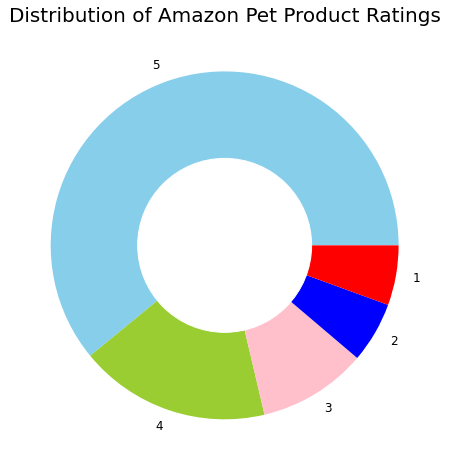

In [171]:
#Product Ratings BreakDown
ratings = data["overall"].value_counts()
numbers = ratings.index
quantity = ratings.values
custom_colors = ["skyblue", "yellowgreen", 'pink', "blue", "red"]
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Amazon Pet Product Ratings", fontsize=20)
plt.show()

In [172]:
#Classifying text as positive, negative & neutral based on the overall ratings
def sentiment(row):
    if row['overall'] >3:
        return 'positive'
    elif row['overall'] <=3:
        return 'negative'


In [173]:
data.apply(lambda row: sentiment(row), axis=1)

0         negative
1         positive
2         positive
3         positive
4         negative
            ...   
157831    positive
157832    positive
157833    positive
157834    positive
157835    positive
Length: 156493, dtype: object

In [174]:
#add new column to the dataset
data['sentiment'] = data.apply(lambda row: sentiment(row), axis = 1)

<ipython-input-174-6c15fb8399bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = data.apply(lambda row: sentiment(row), axis = 1)


In [175]:
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,sentiment
0,A14CK12J7C7JRK,1223000893,Consumer in NorCal,"[0, 0]",I purchased the Trilogy with hoping my two cat...,3,Nice Distraction for my cats for about 15 minutes,1294790400,"01 12, 2011",negative
1,A39QHP5WLON5HV,1223000893,Melodee Placial,"[0, 0]",There are usually one or more of my cats watch...,5,Entertaining for my cats,1379116800,"09 14, 2013",positive
2,A2CR37UY3VR7BN,1223000893,Michelle Ashbery,"[0, 0]",I bought the triliogy and have tested out all ...,4,Entertaining,1355875200,"12 19, 2012",positive
3,A2A4COGL9VW2HY,1223000893,Michelle P,"[2, 2]",My female kitty could care less about these vi...,4,Happy to have them,1305158400,"05 12, 2011",positive
4,A2UBQA85NIGLHA,1223000893,"Tim Isenhour ""Timbo""","[6, 7]","If I had gotten just volume two, I would have ...",3,You really only need vol 2,1330905600,"03 5, 2012",negative


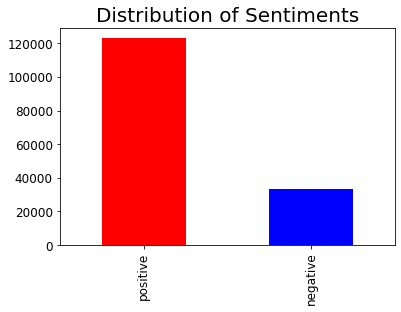

In [176]:
#Display the sentiment column in bar chart
data['sentiment'].value_counts().plot.bar(color = { 'blue', 'red',})
plt.title("Distribution of Sentiments", fontsize=20)
plt.show()

In [177]:
#Classifying text as positive, negative & neutral based on the overall ratings
def sentiment_detail(row):
    if row['overall'] >4:
        return 'very positive'
    if row['overall'] == 4:
        return 'somewhat positive'
    if row['overall'] == 3:
        return 'neutral'
    if row['overall'] == 2:
        return 'somewhat negative'
    elif row['overall'] <2:
        return 'very negative'
data.apply(lambda row: sentiment_detail(row), axis=1)
#add new column to the dataset
data['sentiment_detail'] = data.apply(lambda row: sentiment_detail(row), axis = 1)

<ipython-input-177-6f6353933daf>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment_detail'] = data.apply(lambda row: sentiment_detail(row), axis = 1)


In [178]:
data

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,sentiment,sentiment_detail
0,A14CK12J7C7JRK,1223000893,Consumer in NorCal,"[0, 0]",I purchased the Trilogy with hoping my two cat...,3,Nice Distraction for my cats for about 15 minutes,1294790400,"01 12, 2011",negative,neutral
1,A39QHP5WLON5HV,1223000893,Melodee Placial,"[0, 0]",There are usually one or more of my cats watch...,5,Entertaining for my cats,1379116800,"09 14, 2013",positive,very positive
2,A2CR37UY3VR7BN,1223000893,Michelle Ashbery,"[0, 0]",I bought the triliogy and have tested out all ...,4,Entertaining,1355875200,"12 19, 2012",positive,somewhat positive
3,A2A4COGL9VW2HY,1223000893,Michelle P,"[2, 2]",My female kitty could care less about these vi...,4,Happy to have them,1305158400,"05 12, 2011",positive,somewhat positive
4,A2UBQA85NIGLHA,1223000893,"Tim Isenhour ""Timbo""","[6, 7]","If I had gotten just volume two, I would have ...",3,You really only need vol 2,1330905600,"03 5, 2012",negative,neutral
...,...,...,...,...,...,...,...,...,...,...,...
157831,A136YD08SCJ2LV,B00KMHKOZC,"R. Spell ""raspell""","[0, 0]",The Pet Magasin Retractable Dog Leash is the b...,5,Perfection,1405296000,"07 14, 2014",positive,very positive
157832,A2YKWYC3WQJX5J,B00KMHKOZC,"Shannon Lastowski ""Queen of Caffeine""","[1, 1]",I'm not the biggest fan of retractable leashes...,5,"Nice solid feel, my little boy is thrilled!",1405296000,"07 14, 2014",positive,very positive
157833,A2K0D19N83G6U2,B00KMHKOZC,"Spoiled Rott'n ""Maria Olipas""","[0, 0]",I was provided a leash for my unbiased review....,4,Good leash for small non-darty pets,1405987200,"07 22, 2014",positive,somewhat positive
157834,A3A4ZAIBQWKOZS,B00KMHKOZC,Stephen M. Lerch,"[1, 1]",This is a well designed leash that offers the ...,5,"Quality build, smooth retraction, great leash",1405641600,"07 18, 2014",positive,very positive


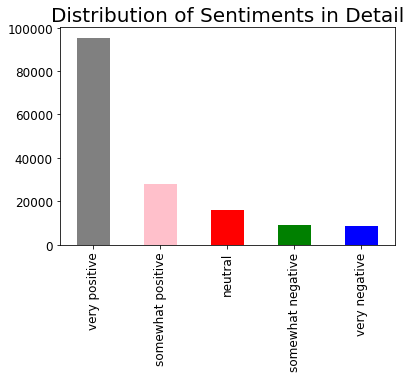

In [179]:
#Display the sentiment column in bar chart
data['sentiment_detail'].value_counts().plot.bar(color = { 'blue', 'red', 'grey', 'green', 'pink'})
plt.title("Distribution of Sentiments in Detail", fontsize=20)
plt.show()

In [180]:
#set sample size to labels w/ minimum count
sample_size = 1000
df_equal_overall = pd.DataFrame()
for i in data.overall.unique():
    X = data[data.overall == i].sample(sample_size)
    df_equal_overall = df_equal_overall.append(X)

In [181]:
df_equal_overall 

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,sentiment,sentiment_detail
79303,A335TMXM8XDA8Q,B001J1Y9VA,Sarah Renaud,"[0, 0]",We purchased these because there is so much sa...,3,"Okay product, unlikely to re-order",1394150400,"03 7, 2014",negative,neutral
42187,A11O4F66S029JF,B000FJ7RAC,K Kormos,"[1, 1]",I have a small size for my Yorkie so I knew I ...,3,Runs big,1377302400,"08 24, 2013",negative,neutral
40329,A1XM6XIT1SPEOM,B000ELSM1E,roses,"[2, 3]",This is a decent product. Doesn't really last ...,3,It's Okay,1353974400,"11 27, 2012",negative,neutral
121947,A2OI0KSC16VW9S,B004QTOASE,A. Zharsky,"[0, 0]","As soon as this product arrived, my cat fell i...",3,better as a cat bed than a scratching pad,1382400000,"10 22, 2013",negative,neutral
118237,AHZ6XWTBYG8A3,B004GEAQ3W,SweetLea,"[1, 1]",My cat HATES it! My cat recently got sick. She...,3,I,1360713600,"02 13, 2013",negative,neutral
...,...,...,...,...,...,...,...,...,...,...,...
25366,A3BP4V04FIRIZT,B000633VES,"Chris ""Hoover Hater""","[2, 3]","Those things have not done a bit of good, 1 we...",1,How many days do you have to wait?,1375315200,"08 1, 2013",negative,very negative
104626,A3K6DBAF8BZQ44,B003DNBG54,mommy3,"[1, 1]",I am very disappointed in this play pen for pe...,1,AWFUL!,1393459200,"02 27, 2014",negative,very negative
31306,A3BYLTNG61R0VX,B00076NO0U,"Shirley Kay ""skmisty""","[0, 0]",my cat wouldn't go near this stuff ... no matt...,1,Useless ...,1395619200,"03 24, 2014",negative,very negative
74811,A203BQIL23YHWS,B001BS4G6O,"W. Horton ""handh""","[0, 0]",Ordered 10 packages of dog pill pockets. (My ...,1,Shipped wrong item.,1386288000,"12 6, 2013",negative,very negative


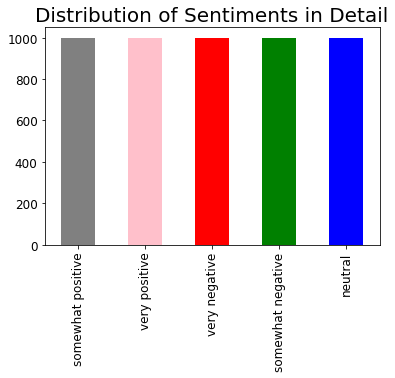

In [182]:
#Display the sentiment column in bar chart
df_equal_overall['sentiment_detail'].value_counts().plot.bar(color = { 'blue', 'red', 'grey', 'green', 'pink'})
plt.title("Distribution of Sentiments in Detail", fontsize=20)
plt.show()

In [183]:
#convert the text to lower case
df_equal_overall = df_equal_overall.astype(str).apply(lambda x: x.str.lower())

In [184]:
#remove stop words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
df_equal_overall['reviewText'] = df_equal_overall['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

#remove all the punctuations
def remove_punctuation(x):
    try:
        x = x.str.replace('[^\w\s]','')
    except:
        pass
    return x
df_equal_overall.apply(remove_punctuation)

# remove non alphanumeric 
df_equal_overall['reviewText'] = df_equal_overall.reviewText.str.replace('[^a-zA-Z0-9 ]', '')

#Lemmatization
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
df_equal_overall['reviewText'] = df_equal_overall['reviewText'].apply(lemmatize_words)

[nltk_data] Error loading stopwords: [WinError 10054] An existing
[nltk_data]     connection was forcibly closed by the remote host
[nltk_data] Error loading wordnet: [WinError 10054] An existing
[nltk_data]     connection was forcibly closed by the remote host


In [186]:
#remove all the punctuations
def remove_punctuation(x):
    try:
        x = x.str.replace('[^\w\s]','')
    except:
        pass
    return x
df_equal_overall.apply(remove_punctuation)


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,sentiment,sentiment_detail
79303,a335tmxm8xda8q,b001j1y9va,sarah renaud,0 0,purchased much salt walk dog hoping protect pa...,3,okay product unlikely to reorder,1394150400,03 7 2014,negative,neutral
42187,a11o4f66s029jf,b000fj7rac,k kormos,1 1,small size yorkie knew needed size cairn terri...,3,runs big,1377302400,08 24 2013,negative,neutral
40329,a1xm6xit1speom,b000elsm1e,roses,2 3,decent product really last long should give 2 ...,3,its okay,1353974400,11 27 2012,negative,neutral
121947,a2oi0ksc16vw9s,b004qtoase,a zharsky,0 0,soon product arrived cat fell love it loved cu...,3,better as a cat bed than a scratching pad,1382400000,10 22 2013,negative,neutral
118237,ahz6xwtbyg8a3,b004geaq3w,sweetlea,1 1,cat hate it cat recently got sick licking scra...,3,i,1360713600,02 13 2013,negative,neutral
...,...,...,...,...,...,...,...,...,...,...,...
25366,a3bp4v04firizt,b000633ves,chris hoover hater,2 3,thing done bit good 1 week even flea would thi...,1,how many days do you have to wait,1375315200,08 1 2013,negative,very negative
104626,a3k6dbaf8bzq44,b003dnbg54,mommy3,1 1,disappointed play pen pet ordered small size p...,1,awful,1393459200,02 27 2014,negative,very negative
31306,a3byltng61r0vx,b00076no0u,shirley kay skmisty,0 0,cat go near stuff matter many time tried intro...,1,useless,1395619200,03 24 2014,negative,very negative
74811,a203bqil23yhws,b001bs4g6o,w horton handh,0 0,ordered 10 package dog pill pocket my dog bitt...,1,shipped wrong item,1386288000,12 6 2013,negative,very negative


In [187]:

df_equal_overall

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,sentiment,sentiment_detail
79303,a335tmxm8xda8q,b001j1y9va,sarah renaud,"[0, 0]",purchased much salt walk dog hoping protect pa...,3,"okay product, unlikely to re-order",1394150400,"03 7, 2014",negative,neutral
42187,a11o4f66s029jf,b000fj7rac,k kormos,"[1, 1]",small size yorkie knew needed size cairn terri...,3,runs big,1377302400,"08 24, 2013",negative,neutral
40329,a1xm6xit1speom,b000elsm1e,roses,"[2, 3]",decent product really last long should give 2 ...,3,it's okay,1353974400,"11 27, 2012",negative,neutral
121947,a2oi0ksc16vw9s,b004qtoase,a. zharsky,"[0, 0]",soon product arrived cat fell love it loved cu...,3,better as a cat bed than a scratching pad,1382400000,"10 22, 2013",negative,neutral
118237,ahz6xwtbyg8a3,b004geaq3w,sweetlea,"[1, 1]",cat hate it cat recently got sick licking scra...,3,i,1360713600,"02 13, 2013",negative,neutral
...,...,...,...,...,...,...,...,...,...,...,...
25366,a3bp4v04firizt,b000633ves,"chris ""hoover hater""","[2, 3]",thing done bit good 1 week even flea would thi...,1,how many days do you have to wait?,1375315200,"08 1, 2013",negative,very negative
104626,a3k6dbaf8bzq44,b003dnbg54,mommy3,"[1, 1]",disappointed play pen pet ordered small size p...,1,awful!,1393459200,"02 27, 2014",negative,very negative
31306,a3byltng61r0vx,b00076no0u,"shirley kay ""skmisty""","[0, 0]",cat go near stuff matter many time tried intro...,1,useless ...,1395619200,"03 24, 2014",negative,very negative
74811,a203bqil23yhws,b001bs4g6o,"w. horton ""handh""","[0, 0]",ordered 10 package dog pill pocket my dog bitt...,1,shipped wrong item.,1386288000,"12 6, 2013",negative,very negative


In [57]:
#Using only fraction, 10% of the data due to compute issues
#data = data.sample(frac = .1) 

In [188]:
data1 = df_equal_overall 

In [189]:
#Check the dimension of the table
print("The dimension of the table is: ", data1.shape)

The dimension of the table is:  (5000, 11)


In [190]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data1['sentiment_detail'] = lb.fit_transform(data1['sentiment_detail'])

In [191]:
#tokenizing and converting reviews into numerical vectors
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = 500, split = ' ')
tokenizer.fit_on_texts(data1['reviewText'].values)
X = tokenizer.texts_to_sequences(data1['reviewText'].values)
X = pad_sequences(X)

In [196]:
#Building the LSTM model using Keras library
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 4998, 120)         60000     
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 4998, 120)         0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 176)               209088    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 354       
Total params: 269,442
Trainable params: 269,442
Non-trainable params: 0
_________________________________________________________________
None


In [197]:
#Splitting the data into training and testing

from sklearn.model_selection import train_test_split
X=pd.get_dummies(data1['reviewText'])
y=pd.get_dummies(data1['sentiment_detail'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [198]:
batch_size = 32
model.fit(X_train, y_train, epochs = 5, batch_size = batch_size, verbose = 'auto')

Epoch 1/5


InvalidArgumentError:  logits and labels must have the same first dimension, got logits shape [32,2] and labels shape [160]
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at <ipython-input-198-a46dc3550e21>:2) ]] [Op:__inference_train_function_6059]

Function call stack:
train_function


In [ ]:
model.evaluate(X_test, y_test) 

In [109]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = 500, split = ' ')
tokenizer.fit_on_texts(data1['reviewText'].values)
X = tokenizer.texts_to_sequences(data1['reviewText'].values)
X = pad_sequences(X)

In [112]:
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1018, 120)         60000     
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 1018, 120)         0         
_________________________________________________________________
lstm (LSTM)                  (None, 176)               209088    
_________________________________________________________________
dense (Dense)                (None, 2)                 354       
Total params: 269,442
Trainable params: 269,442
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
batch_size = 32
model.fit(X_train, y_train, epochs = 5, batch_size = batch_size, verbose = 'auto')

Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5


In [73]:
#extract important columns only

senti = data[['reviewerName', 'reviewText', 'overall', 'summary', 'sentiment']]
check = data[['reviewText']]

In [74]:
#Cleaning texts
#import additional libraries

import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
import numpy as np
import re
import string
import nltk

In [75]:
cleanup_re = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = str(sentence)
    sentence = sentence.lower() #convert text to lower case
    sentence = cleanup_re.sub(' ', sentence).strip() 
    #sentence = " ".join(nltk.word_tokenize(sentence))
    return sentence

senti["Summary_Clean"] = senti["reviewText"].apply(cleanup)
check["Summary_Clean"] = check["reviewText"].apply(cleanup)

<ipython-input-75-c25a820f25c9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senti["Summary_Clean"] = senti["reviewText"].apply(cleanup)
<ipython-input-75-c25a820f25c9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check["Summary_Clean"] = check["reviewText"].apply(cleanup)


In [76]:
#Splitting Train & Test Data

split = senti[["Summary_Clean" , "sentiment"]]
train=split.sample(frac=0.8,random_state=200)
test=split.drop(train.index)

In [77]:
#Feature Extractor for NLTK Naive Bayes Classifier

def word_feats(words):
    features = {}
    for word in words:
        features [word] = True
    return features

In [78]:
train["words"] = train["Summary_Clean"].str.lower().str.split()
test["words"] = test["Summary_Clean"].str.lower().str.split()
check["words"] = check["Summary_Clean"].str.lower().str.split()

train.index = range(train.shape[0])
test.index = range(test.shape[0])
check.index = range(check.shape[0])
prediction =  {} ## For storing results of different classifiers

train_naive = []
test_naive = []
check_naive = []

for i in range(train.shape[0]):
    train_naive = train_naive +[[word_feats(train["words"][i]) , train["sentiment"][i]]]
for i in range(test.shape[0]):
    test_naive = test_naive +[[word_feats(test["words"][i]) , test["sentiment"][i]]]
for i in range(check.shape[0]):
    check_naive = check_naive +[word_feats(check["words"][i])]


classifier = NaiveBayesClassifier.train(train_naive)
print("NLTK Naive bayes Accuracy : {}".format(nltk.classify.util.accuracy(classifier , test_naive)))
classifier.show_most_informative_features(5)

<ipython-input-78-d8e998a124de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check["words"] = check["Summary_Clean"].str.lower().str.split()


NLTK Naive bayes Accuracy : 0.5987220447284345
Most Informative Features
           disappointing = True           negati : positi =     38.4 : 1.0
            unacceptable = True           negati : positi =     21.3 : 1.0
                   shook = True           negati : positi =     18.8 : 1.0
                 vomited = True           negati : positi =     18.8 : 1.0
                  refund = True           negati : positi =     17.1 : 1.0


In [79]:
#Predicting result of nltk classifier
y =[]
only_words= [test_naive[i][0] for i in range(test.shape[0])]
for i in range(test.shape[0]):
    y = y + [classifier.classify(only_words[i] )]
prediction["Naive"]= np.asarray(y)

y1 = []
for i in range(check.shape[0]):
    y1 = y1 + [classifier.classify(check_naive[i] )]

check["Naive"] = y1

<ipython-input-79-8e7d4b0aa491>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check["Naive"] = y1


In [80]:
#import additional libraries
from wordcloud import STOPWORDS
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer


In [81]:
#build countvector and Tdif vector for train &, test and check data
stopwords = set(STOPWORDS)
stopwords.remove("not")
count_vect = CountVectorizer(min_df=2 ,stop_words=stopwords , ngram_range=(1,2))
tfidf_transformer = TfidfTransformer()


In [82]:

X_train_counts = count_vect.fit_transform(train["Summary_Clean"]) 
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X_new_counts = count_vect.transform(test["Summary_Clean"])
X_test_tfidf = tfidf_transformer.transform(X_new_counts)

checkcounts = count_vect.transform(check["Summary_Clean"])
checktfidf = tfidf_transformer.transform(checkcounts)


C:\Users\Nathaniel\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [83]:
#Fitting multinomial NB
from sklearn.naive_bayes import MultinomialNB 

In [84]:
model1 = MultinomialNB().fit(X_train_tfidf , train["sentiment"])
prediction['Multinomial'] = model1.predict_proba(X_test_tfidf)[:,1]
print("Multinomial Accuracy : {}".format(model1.score(X_test_tfidf , test["sentiment"])))

check["multi"] = model1.predict(checktfidf)
## Predicting Sentiment for Check which was Null values for rating

Multinomial Accuracy : 0.7894568690095847


<ipython-input-84-a321f384725f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check["multi"] = model1.predict(checktfidf)


In [85]:
#Fitting Bernouli NB
from sklearn.naive_bayes import BernoulliNB

In [86]:
model2 = BernoulliNB().fit(X_train_tfidf,train["sentiment"])
prediction['Bernoulli'] = model2.predict_proba(X_test_tfidf)[:,1]
print("Bernoulli Accuracy : {}".format(model2.score(X_test_tfidf , test["sentiment"])))

check["Bill"] = model2.predict(checktfidf)
## Predicting Sentiment for Check which was Null values for rating

Bernoulli Accuracy : 0.7843450479233227


<ipython-input-86-8200b50aa116>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check["Bill"] = model2.predict(checktfidf)


In [87]:
#Fitting LogisticRegression
from sklearn import linear_model

In [88]:
logreg = linear_model.LogisticRegression(solver='lbfgs' , C=1000)
logistic = logreg.fit(X_train_tfidf, train["sentiment"])
prediction['LogisticRegression'] = logreg.predict_proba(X_test_tfidf)[:,1]

print("Logistic Regression Accuracy : {}".format(logreg.score(X_test_tfidf , test["sentiment"])))

check["log"] = logreg.predict(checktfidf)
## Predicting Sentiment for Check which was Null values for rating

Logistic Regression Accuracy : 0.8383386581469648


C:\Users\Nathaniel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-88-7325c05cffaa>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check["log"] = logreg.predict(checktfidf)


In [89]:
#Getting the most words in training set

words = count_vect.get_feature_names()
feature_coefs = pd.DataFrame(
    data = list(zip(words, logistic.coef_[0])),
    columns = ['feature', 'coef'])
feature_coefs.sort_values(by="coef")

,feature,coef
39651,not,-23.694781
14763,disappointed,-19.757570
63548,unfortunately,-19.694420
29729,interest,-18.165726
40202,not recommend,-17.729333
...,...,...
4698,best,16.418266
26872,happy,20.844884
25818,great,22.406066
34637,love,22.842441


C:\Users\Nathaniel\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:803: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn("No negative samples in y_true, "
C:\Users\Nathaniel\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:803: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn("No negative samples in y_true, "
C:\Users\Nathaniel\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:803: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn("No negative samples in y_true, "


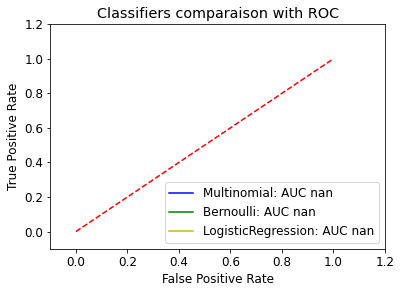

In [90]:
#Evaluate the classifiers
def formatt(x):
    if x == 'neg':
        return 0
    if x == 0:
        return 0
    return 1
vfunc = np.vectorize(formatt)

cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']
for model, predicted in prediction.items():
    if model not in 'Naive':
        false_positive_rate, true_positive_rate, thresholds = roc_curve(test["sentiment"].map(vfunc), predicted)
        
        roc_auc = auc(false_positive_rate, true_positive_rate)
        plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
        cmp += 1
        
   
plt.title('Classifiers comparaison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()     

In [91]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

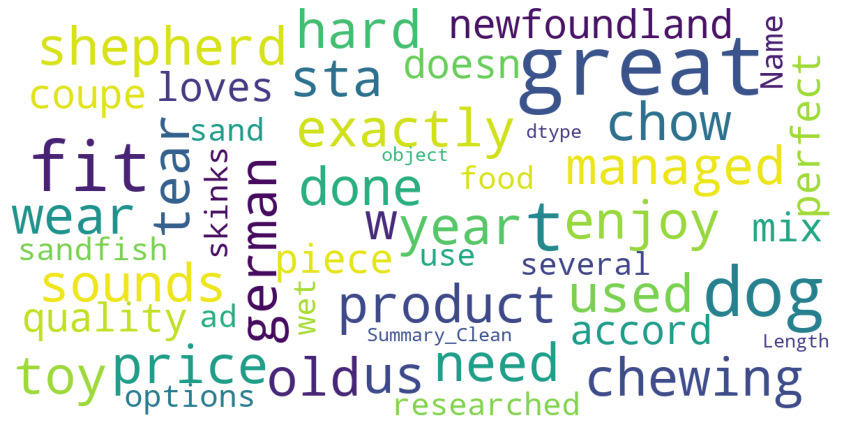

In [92]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

plt.rcParams['font.size']=12 #10 
plt.rcParams['savefig.dpi']=100 #72 
plt.rcParams['figure.subplot.bottom']=.1 

def show_wordcloud(data, title = None): 
    wordcloud = WordCloud( background_color='white', stopwords=stopwords, max_words=300, max_font_size=40, scale=3, random_state=1 
                          
                          # chosen at random by flipping a coin; it was heads )
                         ).generate(str(data)) 
    
    fig = plt.figure(1, figsize=(15, 15)) 
    plt.axis('off') 
    if title: 
        fig.suptitle(title, fontsize=20) 
        fig.subplots_adjust(top=2.3) 
        
    plt.imshow(wordcloud) 
    plt.show() 
    
show_wordcloud(senti["Summary_Clean"])

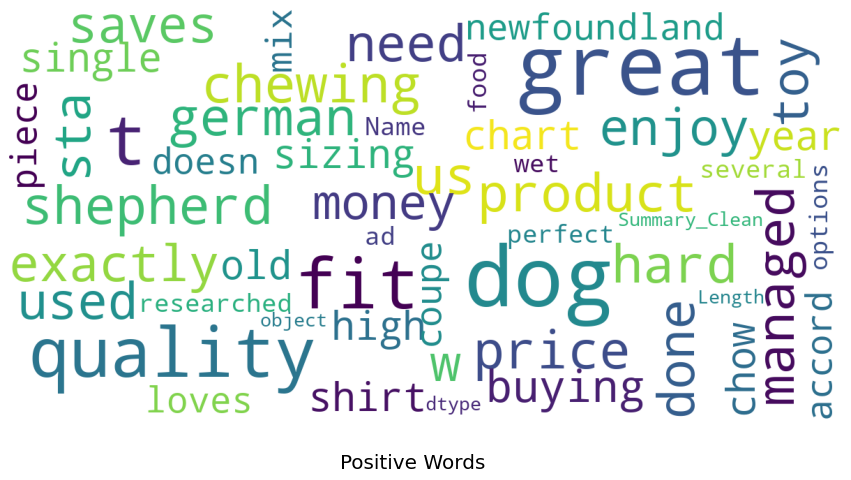

In [93]:
show_wordcloud(senti["Summary_Clean"][senti.sentiment == 'positive'], title = "Positive Words")

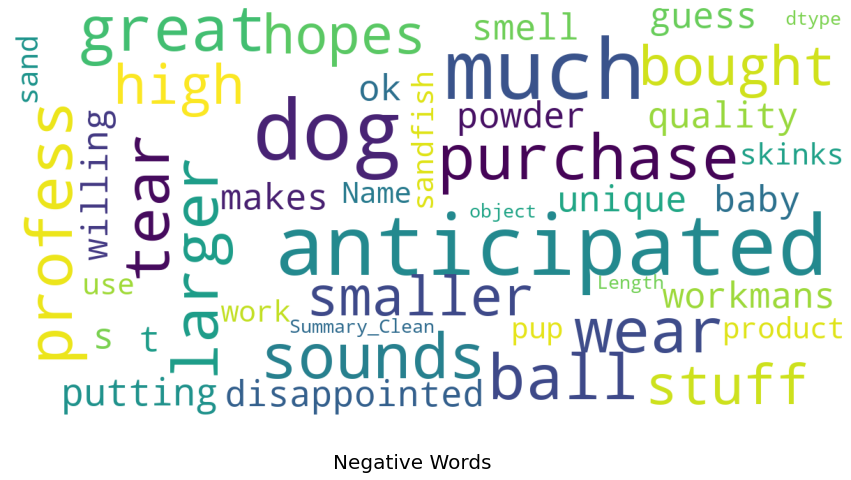

In [94]:
show_wordcloud(senti["Summary_Clean"][senti.sentiment == 'negative'], title = "Negative Words")
